# Analysis of Antibiotics Prescription and Hospitalisation Risk

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import os
import glob
import gzip
from matplotlib.ticker import PercentFormatter
%matplotlib inline

In [2]:
#os.chdir("..")
current_working_dir = os.getcwd()
print(current_working_dir)

c:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit


In [ ]:
# import warnings
# warnings.filterwarnings('ignore')
# warnings.warn('DelftStack')
# warnings.warn('Do not show this message')
# print("No Warning Shown")

In [68]:
#data = pd.read_csv(r'../output/measures/input_2019-01-01.csv.gz', compression='gzip')
##data = pd.read_csv(r'../output/measures/measure_antibiotics_overall_2019-01-01.csv')
#data.head(5)

In [4]:
#read csv.gz files and concatenate them
#path2 = os.getcwd()+'\output\measures'
##path1 = r'C:\Users\m84300af\OneDrive - The University of Manchester\Documents\GitHub\amr-uom-brit\output\measures'
##all_files = glob.glob(os.path.join(path1, "*.csv.gz"))
##print(path1)

##data = pd.concat((pd.read_csv(f) for f in all_files))
##data

In [3]:
data201901 = pd.read_csv(r'../output/measures/input_2019-01-01.csv.gz', compression='gzip')
data201901['date'] = '2019-01-01'
#data201901.head(3)

In [4]:
data201902 = pd.read_csv(r'../output/measures/input_2019-02-01.csv.gz', compression='gzip')
data201902['date'] = '2019-02-01'
data201902 = data201901.append(data201902, ignore_index=True)
#data201902.head(3)

In [5]:
data201903 = pd.read_csv(r'../output/measures/input_2019-03-01.csv.gz', compression='gzip')
data201903['date'] = '2019-03-01'
data201903 = data201902.append(data201903, ignore_index=True)
#data201903.head(3)

In [6]:
data201904 = pd.read_csv(r'../output/measures/input_2019-04-01.csv.gz', compression='gzip')
data201904['date'] = '2019-04-01'
data = data201903.append(data201904, ignore_index=True)
data.head(3)

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,antibacterial_prescriptions_date,sgss_positive,covrx1_dat,covrx2_dat,died_date,...,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id,date
0,2019-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,5,0,0,0,0,2760,2019-01-01
1,2020-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,5,0,5,8546,2019-01-01
2,2021-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,7091,2019-01-01


In [7]:
data.columns

Index(['bmi_date_measured', 'smoking_status_date',
       'most_recent_unclear_smoking_cat_date', 'flu_vaccine_med',
       'flu_vaccine_clinical', 'antibacterial_prescriptions_date',
       'sgss_positive', 'covrx1_dat', 'covrx2_dat', 'died_date', 'uti_date_1',
       'uti_date_2', 'uti_date_3', 'uti_date_4', 'lrti_date_1', 'lrti_date_2',
       'lrti_date_3', 'lrti_date_4', 'age', 'age_cat', 'sex', 'practice',
       'region', 'msoa', 'imd', 'bmi', 'ethnicity', 'smoking_status',
       'gp_count', 'flu_vaccine_tpp', 'flu_vaccine',
       'antibacterial_prescriptions',
       'broad_spectrum_antibiotics_prescriptions', 'primary_care_covid',
       'admitted', 'uti_counts', 'lrti_counts', 'uti_ab_count_1',
       'uti_ab_count_2', 'uti_ab_count_3', 'uti_ab_count_4', 'lrti_ab_count_1',
       'lrti_ab_count_2', 'lrti_ab_count_3', 'lrti_ab_count_4', 'patient_id',
       'date'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 47 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   bmi_date_measured                         3800 non-null   object 
 1   smoking_status_date                       400 non-null    object 
 2   most_recent_unclear_smoking_cat_date      400 non-null    object 
 3   flu_vaccine_med                           400 non-null    object 
 4   flu_vaccine_clinical                      400 non-null    object 
 5   antibacterial_prescriptions_date          68 non-null     object 
 6   sgss_positive                             400 non-null    object 
 7   covrx1_dat                                0 non-null      float64
 8   covrx2_dat                                0 non-null      float64
 9   died_date                                 400 non-null    object 
 10  uti_date_1                          

In [9]:
data.describe(include='all')

,bmi_date_measured,smoking_status_date,most_recent_unclear_smoking_cat_date,flu_vaccine_med,flu_vaccine_clinical,antibacterial_prescriptions_date,sgss_positive,covrx1_dat,covrx2_dat,died_date,...,uti_ab_count_1,uti_ab_count_2,uti_ab_count_3,uti_ab_count_4,lrti_ab_count_1,lrti_ab_count_2,lrti_ab_count_3,lrti_ab_count_4,patient_id,date
count,3800,400,400,400,400,68,400,0.0,0.0,400,...,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000
unique,35,35,35,12,7,24,337,NaN,NaN,203,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,2019-10,2020-04,2020-02,2018-08,2018-11,2019-01-23,2020-01-22,NaN,NaN,2021-10-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01
freq,132,20,20,50,75,6,5,NaN,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.900750,0.902750,0.891250,0.87800,0.897750,0.896750,0.897250,0.896750,5016.811250,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.862194,1.865921,1.840182,1.82015,1.852877,1.856058,1.853389,1.859423,2864.531713,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2584.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,5005.500000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,7444.750000,NaN


## Data Preparation

In [ ]:
# defining dictionaries

dict_sex = {'F': 'Female', 'M': 'Male'}

dict_ethnicity = {1: 'White', 2: 'Mixed', 3: 'Asian', 4: 'Black', 5: 'Other', 0: 'Unknown', np.nan: 'Unknown'}

dict_smoking = {'E': 'Ex-smoker', 'M': 'Unknown', 3: 'Asian', 4: 'Black', 5: 'Other', 0: 'Unknown', np.nan: 'Unknown'}


In [10]:
#prep before plot

data['age'][data['age'] < 0] = np.nan

## remove died cases
#data.died_date.value_counts()

# remove cases with bmi equal 0
data['bmi'][data['bmi'] == 0] = np.nan

# remove cases with negative gp_count
data['gp_count'][data['gp_count'] < 0] = np.nan

# Negative GP consultations mean what? Shall I remove them?

C:\Users\m84300af\AppData\Local\Temp/ipykernel_18640/2258018558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'][data['age'] < 0] = np.nan
C:\Users\m84300af\AppData\Local\Temp/ipykernel_18640/2258018558.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['bmi'][data['bmi'] == 0] = np.nan
C:\Users\m84300af\AppData\Local\Temp/ipykernel_18640/2258018558.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gp_coun

## Plots continuous factors

In [75]:
# function to generate histogram plots
def create_histplot(title, df, ax):
    ax.hist(df, color = 'purple', edgecolor = 'black', bins=20)
    ax.set_title(title)
    ax.set_ylabel('Frequency')
    ax.xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=0)

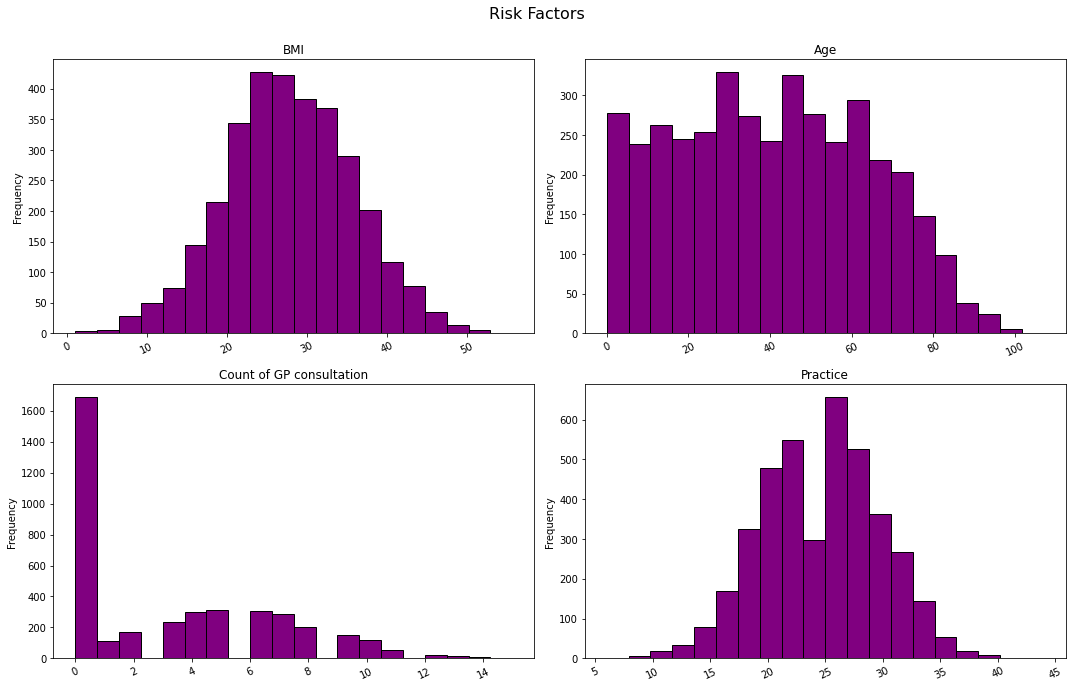

In [76]:
fig, axes = plt.subplots(2,2, 
                        figsize=(15, 10)
                        )
create_histplot('BMI', data['bmi'], axes[0,0])
create_histplot('Age', data['age'], axes[0,1])
create_histplot('Count of GP consultation', data['gp_count'], axes[1,0])
create_histplot('Practice', data['practice'], axes[1,1])
#fig.delaxes(ax=axes[1,1])

fig.suptitle('Risk Factors', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
plt.savefig('../output/hospitalisation_risk/risk_factors_cont.jpg')
plt.show()

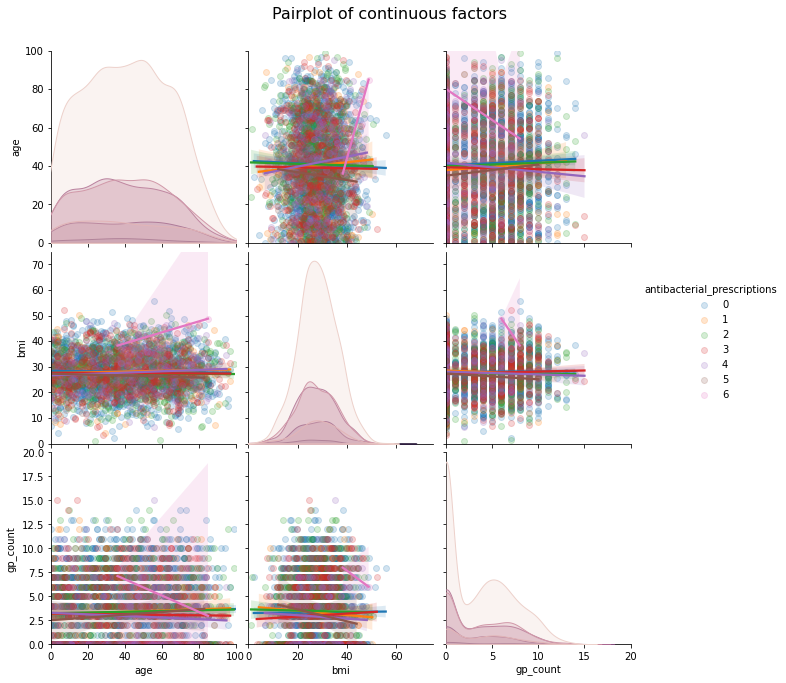

In [93]:
p = sns.pairplot(data, vars=['age', 'bmi', 'gp_count'#, 'practice'
                             ], 
                hue = 'antibacterial_brit', 
#                kind='reg', 
                #markers=["o", "s"], 
                diag_kind="kde",#"hist"
#                plot_kws={#'line_kws':{'color':'red'}, 
#                'scatter_kws': {'alpha': 0.2}}, 
                height = 3)

p.axes[0,2].set_xlim((0,20))
p.axes[0,2].set_ylim((0,100))

p.axes[1,1].set_xlim((0,75))
p.axes[1,1].set_ylim((0,75))

p.axes[2,0].set_xlim((0,100))
p.axes[2,0].set_ylim((0,20))

plt.suptitle('Pairplot of continuous factors', fontsize=16, y=1.05)
plt.savefig('../output/hospitalisation_risk/risk_factors_cont_pairplot.jpg')
plt.show()

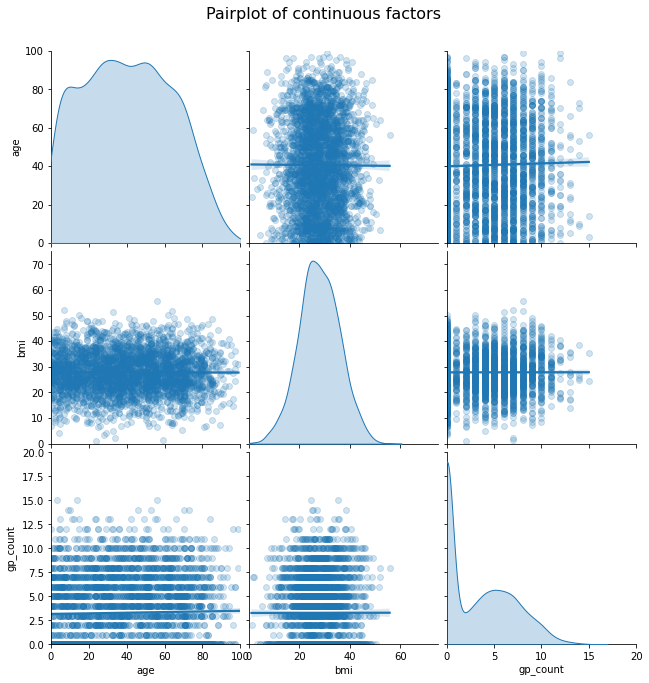

In [94]:
p = sns.pairplot(data, vars=['age', 'bmi', 'gp_count'#, 'practice'
                             ], 
                #hue = 'admitted', 
#                kind='reg', 
                #markers=["o", "s"], 
                diag_kind="kde",#"hist"
#                plot_kws={#'line_kws':{'color':'red'}, 
#                'scatter_kws': {'alpha': 0.2}}, 
                height = 3)

p.axes[0,2].set_xlim((0,20))
p.axes[0,2].set_ylim((0,100))

p.axes[1,1].set_xlim((0,75))
p.axes[1,1].set_ylim((0,75))

p.axes[2,0].set_xlim((0,100))
p.axes[2,0].set_ylim((0,20))

plt.suptitle('Pairplot of continuous factors', fontsize=16, y=1.05)
#plt.savefig('../output/hospitalisation_risk/risk_factors_cont_pairplot2.jpg')
plt.show()

## Plot categorical factors

In [53]:
def create_lineplot(var, title, ax1):
    a = data.groupby(['date', var]).size().reset_index()
    a.columns = ['date', var, 'Freq']
    sns.lineplot(x='date', y='Freq', 
            hue=var, 
            data=a,
            ax=ax1)
    ax1.set_title(title)
    ax1.set_ylabel('Frequency')
    ax1.xaxis.set_tick_params(which='both', labelbottom=True, labeltop=False, rotation=25)

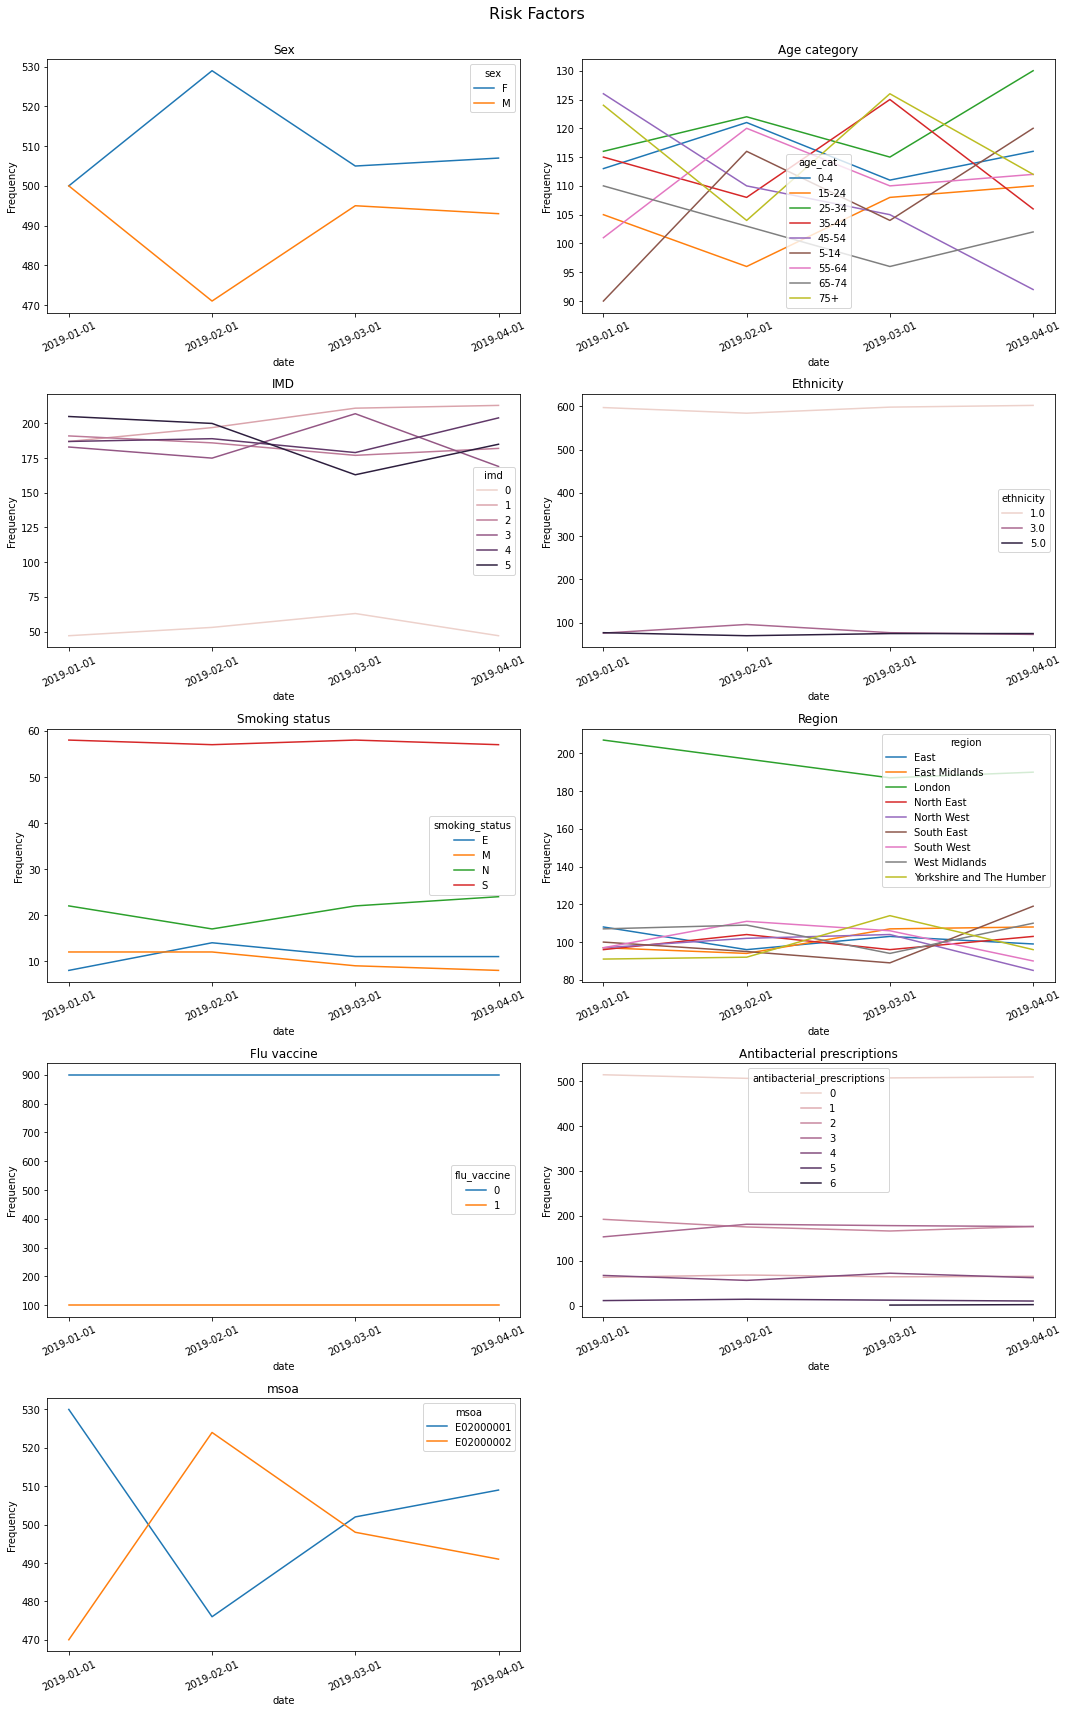

In [73]:
fig, axes = plt.subplots(5,2,
                        figsize=(15, 25)
                        )
create_lineplot('sex', 'Sex', axes[0,0])
create_lineplot('age_cat', 'Age category', axes[0,1])
create_lineplot('imd', 'IMD', axes[1,0])
create_lineplot('ethnicity', 'Ethnicity', axes[1,1])
create_lineplot('smoking_status', 'Smoking status', axes[2,0])
create_lineplot('region', 'Region', axes[2,1])
create_lineplot('flu_vaccine', 'Flu vaccine', axes[3,0])
create_lineplot('antibacterial_brit', 'Antibacterial prescriptions', axes[3,1])
create_lineplot('msoa', 'msoa', axes[4,0])
fig.delaxes(ax=axes[4,1])

fig.suptitle('Risk Factors', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.98])
#plt.tight_layout()
plt.savefig('../output/hospitalisation_risk/risk_factors_cat.jpg')
plt.show()

### Calculating Chalson Comorbidity Index
Based on: https://www.nature.com/articles/4500889.pdf?origin=ppub

In [ ]:
# data['CCI'] = np.nan
# col0 = data.columns.get_loc('CCI')

# col1 = data.columns.get_loc('cancer_comor')
# col2 = data.columns.get_loc('cardiovascular_comor')
# col3 = data.columns.get_loc('chronic_obstructive_pulmonary_comor') ##
# col4 = data.columns.get_loc('heart_failure_comor') ##
# col5 = data.columns.get_loc('connective_tissue_comor')
# col6 = data.columns.get_loc('dementia_comor')
# col7 = data.columns.get_loc('diabetes_comor')
# col8 = data.columns.get_loc('diabetes_complications_comor')
# col9 = data.columns.get_loc('hemiplegia_comor')
# col10 = data.columns.get_loc('hiv_comor')
# col11 = data.columns.get_loc('metastatic_cancer_comor')
# col12 = data.columns.get_loc('mild_liver_comor')
# col13 = data.columns.get_loc('mod_severe_liver_comor')
# col14 = data.columns.get_loc('mod_severe_renal_comor')
# col15 = data.columns.get_loc('mi_comor')
# col16 = data.columns.get_loc('peptic_ulcer_comor')
# col17 = data.columns.get_loc('peripheral_vascular_comor')

In [ ]:
# for idx, x in enumerate(data['CCI']):
#     n=0
#     if data.iat[idx, col15] == 1:
#         n=n+1
#     if data.iat[idx, col2] == 1:
#         n=n+1 
#     if data.iat[idx, col17] == 1:
#         n=n+1 
#     if data.iat[idx, col3] == 1:
#         n=n+1
#     if data.iat[idx, col7] == 1:
#         n=n+1
#     if data.iat[idx, col6] == 1:
#         n=n+1
#     if data.iat[idx, col16] == 1:
#         n=n+1
#     if data.iat[idx, col5] == 1:
#         n=n+1
#     if data.iat[idx, col12] == 1:
#         n=n+1
    
#     if data.iat[idx, col9] == 1:
#         n=n+2
#     if data.iat[idx, col14] == 1:
#         n=n+2
#     if data.iat[idx, col8] == 1:
#         n=n+2
#     if data.iat[idx, col1] == 1:
#         n=n+2
#     #if data.iat[idx, col5] == 1: # Leukaemia
#     #    n=n+2
#     #if data.iat[idx, col12] == 1: # Lymphoma
#     #    n=n+2

#     if data.iat[idx, col13] == 1:
#         n=n+3

#     if data.iat[idx, col11] == 1:
#         n=n+6
#     if data.iat[idx, col10] == 1:
#         n=n+6
    
#     data.iat[idx, col0]=n

In [ ]:
#data.CCI.value_counts()

In [ ]:
#data['CCII'] = np.nan
#col0 = data.columns.get_loc('CCII')

# chalrson_point_1 = [data.columns.get_loc('mi_comor'), 
#                     data.columns.get_loc('cardiovascular_comor'),
#                     data.columns.get_loc('peripheral_vascular_comor'),
#                     data.columns.get_loc('chronic_obstructive_pulmonary_comor'),
#                     data.columns.get_loc('diabetes_comor'),
#                     data.columns.get_loc('dementia_comor'),
#                     data.columns.get_loc('peptic_ulcer_comor'),
#                     data.columns.get_loc('connective_tissue_comor'),
#                     data.columns.get_loc('mild_liver_comor')]

# chalrson_point_2 = [data.columns.get_loc('hemiplegia_comor'),
#                     data.columns.get_loc('mod_severe_renal_comor'),
#                     data.columns.get_loc('diabetes_complications_comor'),
#                     data.columns.get_loc('cancer_comor')]

# chalrson_point_3 = [data.columns.get_loc('mod_severe_liver_comor')]

# chalrson_point_4 = [data.columns.get_loc('metastatic_cancer_comor'),
#                     data.columns.get_loc('hiv_comor')]

In [ ]:
# for idx, x in enumerate(data['CCI']):
#     n=0
#     for y in chalrson_point_1:
#         if data.iat[idx, y] == 1:
#             n=n+1
#         data.iat[idx, col0]=n
#     for y in chalrson_point_2:
#         if data.iat[idx, y] == 1:
#             n=n+2
#         data.iat[idx, col0]=n
#     for y in chalrson_point_3:
#         if data.iat[idx, y] == 1:
#             n=n+3
#         data.iat[idx, col0]=n
#     for y in chalrson_point_4:
#         if data.iat[idx, y] == 1:
#             n=n+6
#         data.iat[idx, col0]=n

In [ ]:
#data.CCI.value_counts()

In [61]:
#ax = data['practice'].value_counts(np.nan).sort_index().plot(kind='bar', figsize=(10, 5), rot=0, color = 'blue', alpha=0.5)
#plt.xlabel('Practice')
#plt.ylabel('Percentage')
#plt.title('Percentage of practices')
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
##plt.xlim(0, 100)
##plt.ylim(0, 1)
#plt.grid()
#plt.savefig(r'../output/hospitalisation_risk/practices.png', edgecolor='none')
#plt.show()

In [62]:
#sns.distplot(data['age'], hist=True, kde=True, 
#             bins=15, color = 'blue', 
#             #hist_kws={'edgecolor':'black'},
#             kde_kws={'linewidth': 2})

#plt.xlabel('Age')
##plt.ylabel('Frequency')
#plt.title('Histogram of age')
#plt.xlim(-10, 100)
##plt.ylim(0, 1100)
#plt.grid(True)
##plt.savefig(r'../output/hospitalisation_risk/antibacterial_prescirption.png', edgecolor='none')
#plt.show()

In [63]:
##data['age_cat'].value_counts().sort_index()

#data['age_cat'].value_counts(np.nan).sort_index().plot(kind='bar', figsize=(10, 5), rot=0, color = 'blue', alpha=0.5)
#plt.xlabel('Age category')
#plt.ylabel('Percentage')
#plt.title('Percentage of age categories')
##plt.xlim(0, 100)
#plt.ylim(0, 0.15)
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
#plt.grid()
#print(data['age_cat'].value_counts().sort_index())
#plt.savefig(r'../output/hospitalisation_risk/age_categories.png', edgecolor='none')
#plt.show()

In [64]:
#for i, binwidth in enumerate([1, 5, 10, 15]):
    
#    # Set up the plot
#    ax = plt.subplot(2, 2, i + 1)
#    
#    # Draw the plot
#    ax.hist(data['bmi'], bins = int(180/binwidth), 
#             color = 'blue', edgecolor = 'black')
    
#    # Title and labels
#    ax.set_title('Histogram with Binwidth = %d' % binwidth, size = 10)
#    ax.set_xlabel('Delay (min)', size = 12)
#    ax.set_ylabel('Flights', size= 12)

#plt.tight_layout()
#plt.show()

In [65]:
#fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
#fig.suptitle('Vertically stacked subplots')

#ax1.hist(data['bmi'], bins = int(180/1), color = 'blue', edgecolor = 'black')
#ax2.hist(data['bmi'], bins = int(180/5), color = 'blue', edgecolor = 'black')
#ax3.hist(data['bmi'], bins = int(180/10), color = 'blue', edgecolor = 'black')
#ax4.hist(data['bmi'], bins = int(180/15), color = 'blue', edgecolor = 'black')

#plt.tight_layout()
#plt.show()

In [66]:
#fig, axs = plt.subplots(2, 2, 
#                        #figsize=(18, 14)
#                        )

#axs[0, 0].hist(data['bmi'], bins = int(180/1), color = 'blue', edgecolor = 'black')
#axs[0, 1].hist(data['bmi'], bins = int(180/5), color = 'blue', edgecolor = 'black')
#axs[1, 0].hist(data['bmi'], bins = int(180/10), color = 'blue', edgecolor = 'black')
#axs[1, 1].hist(data['bmi'], bins = int(180/15), color = 'blue', edgecolor = 'black')

#plt.tight_layout()
#plt.show()

In [67]:
#fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
#fig.suptitle('Vertically stacked subplots')

#ax1.hist(data['bmi'], bins = int(180/1), color = 'blue', edgecolor = 'black')
#ax2.hist(data['bmi'], bins = int(180/5), color = 'blue', edgecolor = 'black')
#ax3.hist(data['bmi'], bins = int(180/10), color = 'blue', edgecolor = 'black')
#ax4.hist(data['bmi'], bins = int(180/15), color = 'blue', edgecolor = 'black')

#for ax in fig.get_axes():
#    ax.label_outer()
#    ax.set(xlabel='x-label', ylabel='y-label')

#plt.tight_layout()
#plt.show()